## Experiments: Comparing RSAST with other methods

In [1]:
import sys 
import os 
#add sast library path
file_path = os.path.dirname(os.getcwd())+"/sast"

#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.path.dirname(os.getcwd())+"\sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"/sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"\sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

#add cd_diagram library path
file_path = os.path.dirname(os.getcwd())+"\cd_diagram"

#file_path = r"C:\Users\Public\random_sast\cd_diagram"
sys.path.append(file_path)


file_path = os.path.dirname(os.getcwd())+"/cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"\cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"/cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

sys.path


['c:\\Users\\Nicolas R\\random_sast\\ExperimentationRSAST',
 'c:\\ProgramData\\Anaconda3\\python39.zip',
 'c:\\ProgramData\\Anaconda3\\DLLs',
 'c:\\ProgramData\\Anaconda3\\lib',
 'c:\\ProgramData\\Anaconda3',
 '',
 'C:\\Users\\Nicolas R\\AppData\\Roaming\\Python\\Python39\\site-packages',
 'c:\\ProgramData\\Anaconda3\\lib\\site-packages',
 'c:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32',
 'c:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'c:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'c:\\ProgramData\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Nicolas R\\.ipython',
 'c:\\Users\\Nicolas R\\random_sast/sast',
 'c:\\Users\\Nicolas R\\random_sast\\sast',
 'c:\\Users\\Nicolas R\\random_sast\\ExperimentationRSAST/sast',
 'c:\\Users\\Nicolas R\\random_sast\\ExperimentationRSAST\\sast',
 'c:\\Users\\Nicolas R\\random_sast\\cd_diagram',
 'c:\\Users\\Nicolas R\\random_sast/cd_diagram',
 'c:\\Users\\Nicolas R\\random_sast\\Experimentation

In [2]:
from sast import *
from sktime.datasets import load_UCR_UEA_dataset, tsc_dataset_names
from sktime.classification.kernel_based import RocketClassifier
import time
import pandas as pd
from sktime.transformations.panel.shapelet_transform import ShapeletTransform
import matplotlib.pyplot as plt
import os
import seaborn as sns
import math
hyperparameter='ACF&PACF: n_random_points=10 nb_inst_per_class=10'

### Reading Datasets

In [3]:

# Set directory where the csv files are located
directory = os.getcwd()+'/ResultsByClassifier'

# Create an empty list to store the dataframes
dfs = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    # Check if the file starts with "df_overall_tunning" and ends with ".csv"
    if filename.endswith(".csv"):
        # Read the csv file into a dataframe
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)

        # Append the dataframe to the list
        df['filename']=filename
        dfs.append(df)

# Concatenate all the dataframes in the list into one dataframe
df_other_methods = pd.concat(dfs, ignore_index=True)
df_other_methods=df_other_methods[['filename','folds:','0']]
df_other_methods['method']=df_other_methods['filename'].str.split('_').str[0]+"_UCR_RES_0"
df_other_methods
df_other_methods=df_other_methods.rename(columns={'folds:':'dataset','0':'score'})
df_other_methods=df_other_methods[['dataset','score','method']]



In [4]:
# Set directory where the csv files are located

filepath = os.getcwd()+'/ResultsSummarized/UCR_ARCHIVE_singleTrainTest_ALL_METHODS_MOD.csv'

df = pd.read_csv(filepath)
df = df.melt(id_vars=["Unnamed: 0"], 
        var_name="method", 
        value_name="score")
df = df.rename(columns={'Unnamed: 0':'dataset'})
df['method'] = df['method']+"_UCR_TRAIN_TEST"
df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])
df[df.dataset=="StarlightCurves"]

,dataset,score,method


In [5]:
# Set directory where the csv files are located
"""
filepath = os.getcwd()+'/ResultsSummarized/UCR_ARCHIVE_100RESAMPLES_ALL_METHODS_MOD.csv'
df = pd.read_csv(filepath)
df = df.melt(id_vars=["Unnamed: 0"], 
        var_name="method", 
        value_name="score")
df = df.rename(columns={'Unnamed: 0':'dataset'})
df['method'] = df['method']+"_UCR_AVG_100RES"
df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])
"""

'\nfilepath = os.getcwd()+\'/ResultsSummarized/UCR_ARCHIVE_100RESAMPLES_ALL_METHODS_MOD.csv\'\ndf = pd.read_csv(filepath)\ndf = df.melt(id_vars=["Unnamed: 0"], \n        var_name="method", \n        value_name="score")\ndf = df.rename(columns={\'Unnamed: 0\':\'dataset\'})\ndf[\'method\'] = df[\'method\']+"_UCR_AVG_100RES"\ndf=df[[\'dataset\',\'score\',\'method\']]\ndf_other_methods=pd.concat([df_other_methods,df])\n'

In [6]:

# Set directory where the csv files are located
#df_other_methods=df_other_methods[df_other_methods.method!="STC"]
filepath = os.getcwd()+'/ResultsSummarized/SAST_PAPER_singleTrainTest_SAST_ST.csv'
df = pd.read_csv(filepath)
df = df.rename(columns={'folds:':'dataset','STC':'score'})
df['method']="STC_PAPERSAST_TRAIN_TEST"
df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])



In [7]:
# Set directory where the csv files are located

filepath = os.getcwd()+'/ResultsSummarized/SAST_PAPER_singleTrainTest_SAST_ST.csv'
df = pd.read_csv(filepath)
df = df.rename(columns={'folds:':'dataset','0':'score'})
df['method']="SAST_PAPERSAST_TRAIN_TEST"
df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])

In [8]:
# Set directory where the csv files are located

filepath = os.getcwd()+'/ResultsSummarized/ROCKET_PAPER_10RESAMPLES_BAKE_OFF.csv'
df = pd.read_csv(filepath)
df = df.melt(id_vars=["Dataset"], 
        var_name="method", 
        value_name="score")
df = df.rename(columns={'Dataset':'dataset'})
df['method'] = df['method']+"_PAPERROCKET_AVG_10RES"
df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])


In [9]:
# Set directory where the csv files are located


filepath = os.getcwd()+'/ResultsSummarized/ROCKET_PAPER_10RESAMPLES_2018_DS.csv'
df = pd.read_csv(filepath)
df = df.melt(id_vars=["Dataset"], 
        var_name="method", 
        value_name="score")
df = df.rename(columns={'Dataset':'dataset'})
df['method'] = df['method']+"_PAPERROCKET_AVG_10RES"
df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])


In [10]:
# Set directory where the csv files are located


filepath = os.getcwd()+'/ResultsSummarized/RDST_PAPER_30RESAMPLES_ALL_METHODS.csv'
df = pd.read_csv(filepath)
df = df.melt(id_vars=["dataset_name"], 
        var_name="method", 
        value_name="score")
df = df.rename(columns={'dataset_name':'dataset'})
df['method'] = df['method']+"_PAPERRDST_AVG_30RES"
df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])


In [11]:
# Set directory where the csv files are located

filepath = os.getcwd()+'/ResultsSummarized/RDST_PAPER_30RESAMPLES_RDST.csv'
df = pd.read_csv(filepath)
df = df.rename(columns={'dataset':'dataset','acc_mean':'score','model':'method'})
df['method'] = df['method']+"_PAPERRDST_AVG_30RES"
df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])


In [12]:

# Set directory where the csv files are located
directory = os.getcwd()+'/ResultsSummarized/Server17_Comparison_Other_Methods'

# Create an empty list to store the dataframes
dfs = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    # Check if the file starts with "df_overall_tunning" and ends with ".csv"
    if filename.endswith(".csv"):
        # Read the csv file into a dataframe
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)

        # Append the dataframe to the list
        
        dfs.append(df)

# Concatenate all the dataframes in the list into one dataframe
df = pd.concat(dfs, ignore_index=True)
df=df[['dataset_name','classifier_name','accuracy']]

df=pd.pivot_table(df, index=['dataset_name','classifier_name'],aggfunc='mean').reset_index()
df['method']=df['classifier_name'].str.split('_').str[0]+"_RSAST_TRAIN_TEST"
df=df.rename(columns={'dataset_name':'dataset','accuracy':'score'})

df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])
df

,dataset,score,method
0,ACSF1,0.918000,RDST_RSAST_TRAIN_TEST
1,ACSF1,0.890000,Rocket_RSAST_TRAIN_TEST
2,Adiac,0.727877,RDST_RSAST_TRAIN_TEST
3,Adiac,0.784143,Rocket_RSAST_TRAIN_TEST
4,AllGestureWiimoteX,0.768857,RDST_RSAST_TRAIN_TEST
...,...,...,...
251,Worms,0.729870,Rocket_RSAST_TRAIN_TEST
252,WormsTwoClass,0.763636,RDST_RSAST_TRAIN_TEST
253,WormsTwoClass,0.800000,Rocket_RSAST_TRAIN_TEST
254,Yoga,0.928333,RDST_RSAST_TRAIN_TEST


In [13]:
df_other_methods['method'].unique()

array(['BOSS_UCR_RES_0', 'Catch22_UCR_RES_0', 'cBOSS_UCR_RES_0',
       'HIVE-COTEv1_UCR_RES_0', 'InceptionTime_UCR_RES_0',
       'ProximityForest_UCR_RES_0', 'ResNet_UCR_RES_0', 'RISE_UCR_RES_0',
       'ROCKET_UCR_RES_0', 'S-BOSS_UCR_RES_0', 'STC_UCR_RES_0',
       'TS-CHIEF_UCR_RES_0', 'TSF_UCR_RES_0', 'WEASEL_UCR_RES_0',
       'NB_UCR_TRAIN_TEST', 'C45_UCR_TRAIN_TEST', 'SVML_UCR_TRAIN_TEST',
       'SVMQ_UCR_TRAIN_TEST', 'BN_UCR_TRAIN_TEST', 'RandF_UCR_TRAIN_TEST',
       'RotF_UCR_TRAIN_TEST', 'MLP_UCR_TRAIN_TEST',
       'Euclidean_1NN_UCR_TRAIN_TEST', 'DTW_R1_1NN_UCR_TRAIN_TEST',
       'DTW_Rn_1NN_UCR_TRAIN_TEST', 'DDTW_R1_1NN_UCR_TRAIN_TEST',
       'DDTW_Rn_1NN_UCR_TRAIN_TEST', 'ERP_1NN_UCR_TRAIN_TEST',
       'LCSS_1NN_UCR_TRAIN_TEST', 'MSM_1NN_UCR_TRAIN_TEST',
       'TWE_1NN_UCR_TRAIN_TEST', 'WDDTW_1NN_UCR_TRAIN_TEST',
       'WDTW_1NN_UCR_TRAIN_TEST', 'DD_DTW_UCR_TRAIN_TEST',
       'DTD_C_UCR_TRAIN_TEST', 'DTW_F_UCR_TRAIN_TEST',
       'ST_UCR_TRAIN_TEST', 'LS_UCR_TRAI

In [14]:

#df_other_methods=df_other_methods[df_other_methods['method'].isin(['ST_UCR_TRAIN_TEST','SAST_PAPERSAST_TRAIN_TEST','DTW_R1_1NN_UCR_TRAIN_TEST'])]
#df_other_methods=df_other_methods[df_other_methods['method'].isin(['RDST_RSAST_TRAIN_TEST','FS_UCR_TRAIN_TEST', 'LS_UCR_TRAIN_TEST','DTW_R1_1NN_UCR_TRAIN_TEST'])]
#df_other_methods=df_other_methods[df_other_methods['method'].isin(['EE_UCR_TRAIN_TEST', 'TSBF_UCR_TRAIN_TEST','BOSS_UCR_TRAIN_TEST','DTW_R1_1NN_UCR_TRAIN_TEST'])]
#df_other_methods=df_other_methods[df_other_methods['method'].isin(['Rocket_RSAST_TRAIN_TEST','HIVE-COTE_UCR_TRAIN_TEST','CHIEF_PAPERROCKET_AVG_10RES'])]

df_other_methods=df_other_methods[df_other_methods['method'].isin(['Rocket_PAPERROCKET_AVG_10RES','HCTE_PAPERROCKET_AVG_10RES','ST_PAPERROCKET_AVG_10RES','BOSS_PAPERROCKET_AVG_10RES', 'R_DST_PAPERRDST_AVG_30RES'])]

df_other_methods['method'].unique()

array(['Rocket_PAPERROCKET_AVG_10RES', 'BOSS_PAPERROCKET_AVG_10RES',
       'ST_PAPERROCKET_AVG_10RES', 'HCTE_PAPERROCKET_AVG_10RES',
       'R_DST_PAPERRDST_AVG_30RES'], dtype=object)

In [15]:
# Set directory where the csv files are located
#directory = os.getcwd()+'/ResultsRsast'
#directory = os.getcwd()+'/results_accuracy_per_ds'

directories=[]
#directories.append(os.getcwd()+'/ResultsRsast/Server17_Comparison_RSAST')
#directories.append(os.getcwd()+'/ResultsRsast/Server17_Comparison_RSAST_All')
#directories.append(os.getcwd()+'/ResultsRsast/Server17_Comparison_RSAST_Extra_1')
#directories.append(os.getcwd()+'/ResultsRsast/Server17_Comparison_RSAST_Extra_2')
#directories.append(os.getcwd()+'/ResultsRsast/Server17_not_used_sast')
directories.append(os.getcwd()+'/ResultsRsast/Server17_Resampling_Comparison_RSAST')
#directories.append(os.getcwd()+'/ResultsRsast/Server16_Hyperparameter_Tunning')
#directories.append(os.getcwd()+'/ResultsRsast/Server17_Hyperparameter_Tunning')
#directories.append(os.getcwd()+'/results_accuracy_per_ds')
#directories.append(os.getcwd()+'/results_accuracy_per_ds_10000')

# Create an empty list to store the dataframes
dfs = []

# Loop through all files in the directory
for directory in directories:
    for filename in os.listdir(directory):
        # Check if the file starts with "df_overall_tunning" and ends with ".csv"
        if filename.startswith("df_all_overall_tunning") and filename.endswith(".csv"):
            # Read the csv file into a dataframe
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath)
            df['rpoint']=df['rpoint'].astype(str)
            df['nb_per_class']=df['nb_per_class'].astype(str)
            df['rpoint']=df['rpoint'].replace("(lenthg ts)//2","half_len")
            df['nb_per_class']=df['nb_per_class'].replace("(max instances per class)//2","half_instance")
            df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
            df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
            # Append the dataframe to the list
            dfs.append(df)

# Concatenate all the dataframes in the list into one dataframe
df_result = pd.concat(dfs, ignore_index=True)
# df_result.head(3)

C:\Users\Nicolas R\AppData\Local\Temp\ipykernel_12156\3110054331.py:32: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
C:\Users\Nicolas R\AppData\Local\Temp\ipykernel_12156\3110054331.py:33: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
C:\Users\Nicolas R\AppData\Local\Temp\ipykernel_12156\3110054331.py:32: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
C:\Users\Nicolas R\AppData\Local\Temp\ipykernel_12156\3110054331.py:33: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.

In [16]:
df_result=df_result[['accuracy','dataset_name','classifier_name','time']]

df_result=df_result[df_result["classifier_name"]==hyperparameter]

df_result.dataset_name.unique()


array(['ACSF1', 'Adiac', 'AllGestureWiimoteX', 'AllGestureWiimoteY',
       'AllGestureWiimoteZ', 'ArrowHead', 'Beef', 'BeetleFly',
       'BirdChicken', 'BME', 'Car', 'CBF', 'Chinatown',
       'ChlorineConcentration', 'CinCECGTorso', 'Coffee', 'Computers',
       'CricketX', 'CricketY', 'CricketZ', 'Crop', 'DiatomSizeReduction',
       'DistalPhalanxOutlineAgeGroup', 'DistalPhalanxOutlineCorrect',
       'DistalPhalanxTW', 'DodgerLoopDay', 'DodgerLoopGame',
       'DodgerLoopWeekend', 'Earthquakes', 'ECG200', 'ECG5000',
       'ECGFiveDays', 'ElectricDevices', 'EOGHorizontalSignal',
       'EOGVerticalSignal', 'EthanolLevel', 'FaceAll', 'FaceFour',
       'FacesUCR', 'FiftyWords', 'Fish', 'FordA', 'FordB',
       'FreezerRegularTrain', 'FreezerSmallTrain', 'Fungi',
       'GestureMidAirD1', 'GestureMidAirD2', 'GestureMidAirD3',
       'GesturePebbleZ1', 'GesturePebbleZ2', 'MelbournePedestrian',
       'PickupGestureWiimoteZ', 'PLAID', 'ShakeGestureWiimoteZ'],
      dtype=object)

In [17]:
len(df_result.dataset_name.unique())

55

In [18]:

df_other_methods=df_other_methods.rename(columns={"dataset":"dataset_name","score":"accuracy","method":"classifier_name"})
df_other_methods = df_other_methods[df_other_methods['dataset_name'].isin(df_result.dataset_name.values)]

df_other_methods

,dataset_name,accuracy,classifier_name
0,Adiac,0.783400,Rocket_PAPERROCKET_AVG_10RES
1,ArrowHead,0.814300,Rocket_PAPERROCKET_AVG_10RES
2,Beef,0.833300,Rocket_PAPERROCKET_AVG_10RES
3,BeetleFly,0.900000,Rocket_PAPERROCKET_AVG_10RES
4,BirdChicken,0.900000,Rocket_PAPERROCKET_AVG_10RES
...,...,...,...
68,FreezerRegularTrain,0.996339,R_DST_PAPERRDST_AVG_30RES
70,FreezerSmallTrain,0.976421,R_DST_PAPERRDST_AVG_30RES
212,Crop,0.768746,R_DST_PAPERRDST_AVG_30RES
220,CinCECGTorso,0.976836,R_DST_PAPERRDST_AVG_30RES


In [19]:
# concatenate the two dataframes
concatenated_df = pd.concat([df_other_methods, df_result])

# reset the index of the concatenated dataframe
concatenated_df = concatenated_df.reset_index(drop=True)


In [20]:
concatenated_df['classifier_name'].unique()

array(['Rocket_PAPERROCKET_AVG_10RES', 'BOSS_PAPERROCKET_AVG_10RES',
       'ST_PAPERROCKET_AVG_10RES', 'HCTE_PAPERROCKET_AVG_10RES',
       'R_DST_PAPERRDST_AVG_30RES',
       'ACF&PACF: n_random_points=10 nb_inst_per_class=10'], dtype=object)

In [21]:
concatenated_df['classifier_name'].replace(hyperparameter,"RSAST",inplace=True)
hyperparameter="RSAST"

In [22]:
concatenated_df['classifier_name'].replace("DTW_R1_1NN_UCR_TRAIN_TEST","1NN-DTW",inplace=True)
concatenated_df['classifier_name'].replace("ST_UCR_TRAIN_TEST","STC",inplace=True)
concatenated_df['classifier_name'].replace("SAST_PAPERSAST_TRAIN_TEST","SAST",inplace=True)
concatenated_df['classifier_name'].replace("FS_UCR_TRAIN_TEST","FS",inplace=True)
concatenated_df['classifier_name'].replace("LS_UCR_TRAIN_TEST","LS",inplace=True)
concatenated_df['classifier_name'].replace("BOSS_UCR_TRAIN_TEST","BOSS",inplace=True)
concatenated_df['classifier_name'].replace("TSBF_UCR_TRAIN_TEST","TSBF",inplace=True)
concatenated_df['classifier_name'].replace("EE_UCR_TRAIN_TEST","EE",inplace=True)
concatenated_df['classifier_name'].replace("HIVE-COTE_UCR_TRAIN_TEST","HIVE-COTE",inplace=True)
concatenated_df['classifier_name'].replace("Rocket_RSAST_TRAIN_TEST","ROCKET",inplace=True)
concatenated_df['classifier_name'].replace("TSBF_UCR_TRAIN_TEST","TSBF",inplace=True)
concatenated_df['classifier_name'].replace("ResNet_PAPERROCKET_AVG_10RES","ResNet_10RES",inplace=True)
concatenated_df['classifier_name'].replace("HCTE_PAPERROCKET_AVG_10RES","HIVE-COTE_10RES",inplace=True)
concatenated_df['classifier_name'].replace("ITime_PAPERROCKET_AVG_10RES","InceptionTime_10RES",inplace=True)
concatenated_df['classifier_name'].replace("CHIEF_PAPERROCKET_AVG_10RES","TS-CHIEF_10RES",inplace=True)
concatenated_df['classifier_name'].replace("Rocket_PAPERROCKET_AVG_10RES","ROCKET_10RES",inplace=True)
concatenated_df['classifier_name'].replace("BOSS_PAPERROCKET_AVG_10RES","BOSS_10RES",inplace=True)
concatenated_df['classifier_name'].replace("ST_PAPERROCKET_AVG_10RES","ST_10RES",inplace=True)
concatenated_df['classifier_name'].replace("R_DST_PAPERRDST_AVG_30RES","RDST_30RES",inplace=True)

In [23]:
concatenated_df['classifier_name'].unique()

array(['ROCKET_10RES', 'BOSS_10RES', 'ST_10RES', 'HIVE-COTE_10RES',
       'RDST_30RES', 'RSAST'], dtype=object)

In [24]:
len(concatenated_df.dataset_name.unique())

55

In [25]:
concatenated_df[concatenated_df.dataset_name=="StarLightCurves"]

,dataset_name,accuracy,classifier_name,time


### Overall analysis

#### Accuracy: RSAST vs Other methods

C:\Users\Nicolas R\AppData\Local\Temp\ipykernel_12156\853197985.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


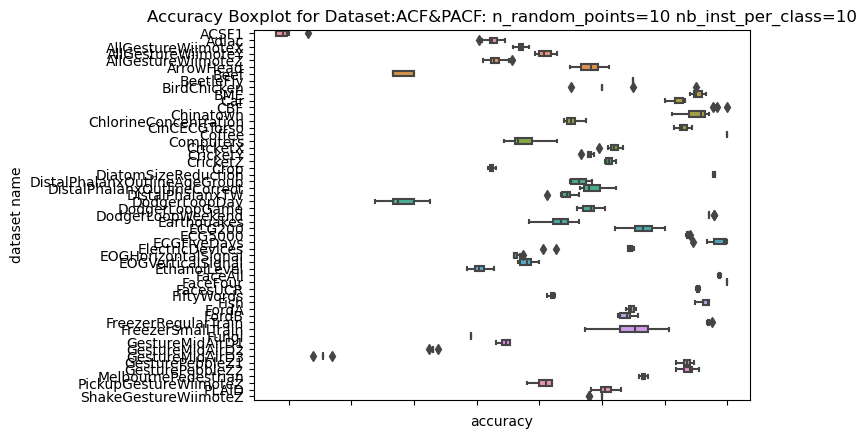

In [26]:
max_bx=max(df_result.accuracy)
min_bx=min(df_result.accuracy)


#df_to_cd=pd.pivot_table(df_to_cd, index=['dataset_name','classifier_name'], columns=['rpoint'],values='accuracy')
#df_to_cd = df_to_cd.reindex(columns=["1","10","30","50","100","half_len"])

#print(df_to_cd.head(5))

# Plot
fig, ax = plt.subplots()


#order=list(df_to_cd)
sns.boxplot(data=df_result, y='dataset_name', x='accuracy')
#plt.boxplot(df_to_cd, labels=list(df_to_cd), showfliers=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

# Axis details

ax.set(ylabel='dataset name', xlabel='accuracy', title='Accuracy Boxplot for Dataset:'+str(df_result["classifier_name"].unique()[0]))

#plt.xticks([1, 2, 3, 4, 5, 6],list(df_to_cd) )
#print(df_to_cd.describe())
#plt.tight_layout()
# save plot
plt.savefig('images_boxplot_acc/boxplot_acc_per_ds.png')

In [27]:
filter_param=concatenated_df[concatenated_df.classifier_name==hyperparameter]

In [28]:
stats = filter_param.groupby(['dataset_name'])['accuracy'].agg(['mean', 'count', 'std'])

ci95_hi = []
ci95_lo = []
ci95_hi_lo = []

for i in stats.index:
    m, c, s = stats.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))
    ci95_hi_lo.append(1.96*s/math.sqrt(c))

#stats['ci95_hi'] = ci95_hi
#stats['ci95_lo'] = ci95_lo
stats['ci95_interval'] = ci95_hi_lo
print(stats.round(2))

                              mean  count   std  ci95_interval
dataset_name                                                  
ACSF1                         0.29     10  0.02           0.01
Adiac                         0.63     10  0.01           0.01
AllGestureWiimoteX            0.67     10  0.01           0.00
AllGestureWiimoteY            0.71     10  0.01           0.01
AllGestureWiimoteZ            0.63     10  0.01           0.01
ArrowHead                     0.78     10  0.02           0.01
BME                           0.95     10  0.01           0.01
Beef                          0.48     10  0.02           0.01
BeetleFly                     0.85     10  0.00           0.00
BirdChicken                   0.82     10  0.05           0.03
CBF                           0.98     10  0.01           0.00
Car                           0.92     10  0.01           0.01
Chinatown                     0.95     10  0.02           0.01
ChlorineConcentration         0.75     10  0.01        

In [29]:
# create a pivot table with the mean of score by hyperparameter
t_score_by_method=pd.pivot_table(concatenated_df, values='accuracy', columns=['classifier_name'],index=['dataset_name'], aggfunc='mean')
#t_score_by_method=score_by_method.transpose()[[hyperparameter,"SAST"]].round(2)
#t_score_by_method=score_by_method.transpose().round(2)
t_score_by_method.iloc[0:25,:]


classifier_name,BOSS_10RES,HIVE-COTE_10RES,RDST_30RES,ROCKET_10RES,RSAST,ST_10RES
dataset_name,,,,,,
ACSF1,NaN,NaN,0.837333,0.8860,0.292000,NaN
Adiac,0.7647,0.8107,0.738107,0.7834,0.625064,0.7826
AllGestureWiimoteX,NaN,NaN,NaN,NaN,0.669714,NaN
AllGestureWiimoteY,NaN,NaN,NaN,NaN,0.709286,NaN
AllGestureWiimoteZ,NaN,NaN,NaN,NaN,0.630857,NaN
ArrowHead,0.8343,0.8629,0.881714,0.8143,0.780000,0.7371
BME,NaN,NaN,0.978889,1.0000,0.952667,NaN
Beef,0.8000,0.9333,0.724444,0.8333,0.480000,0.9000
BeetleFly,0.9000,0.9500,0.913333,0.9000,0.850000,0.9000


In [30]:
t_score_by_method.iloc[25:49,:]

classifier_name,BOSS_10RES,HIVE-COTE_10RES,RDST_30RES,ROCKET_10RES,RSAST,ST_10RES
dataset_name,,,,,,
DodgerLoopDay,NaN,NaN,NaN,0.5725,0.482500,NaN
DodgerLoopGame,NaN,NaN,NaN,0.8732,0.779710,NaN
DodgerLoopWeekend,NaN,NaN,NaN,0.9746,0.972464,NaN
ECG200,0.8700,0.8500,0.903000,0.9060,0.865000,0.8300
ECG5000,0.9413,0.9462,0.948015,0.9472,0.937067,0.9438
ECGFiveDays,1.0000,1.0000,0.991212,1.0000,0.985947,0.9837
EOGHorizontalSignal,NaN,NaN,0.787201,NaN,0.663260,NaN
EOGVerticalSignal,NaN,NaN,0.724862,NaN,0.679834,NaN
Earthquakes,0.7482,0.7482,0.741727,0.7482,0.731655,0.7410


In [31]:
t_score_by_method.iloc[49:75,:]

classifier_name,BOSS_10RES,HIVE-COTE_10RES,RDST_30RES,ROCKET_10RES,RSAST,ST_10RES
dataset_name,,,,,,
GesturePebbleZ1,NaN,NaN,NaN,0.9058,0.934302,NaN
GesturePebbleZ2,NaN,NaN,NaN,0.8304,0.937342,NaN
MelbournePedestrian,NaN,NaN,NaN,0.9044,0.865929,NaN
PLAID,NaN,NaN,NaN,0.9026,0.805214,NaN
PickupGestureWiimoteZ,NaN,NaN,NaN,NaN,0.708000,NaN
ShakeGestureWiimoteZ,NaN,NaN,NaN,NaN,0.796000,NaN


In [32]:
t_score_by_method.iloc[76:,:]

classifier_name,BOSS_10RES,HIVE-COTE_10RES,RDST_30RES,ROCKET_10RES,RSAST,ST_10RES
dataset_name,,,,,,


In [33]:
t_score_by_method.describe().round(2)

classifier_name,BOSS_10RES,HIVE-COTE_10RES,RDST_30RES,ROCKET_10RES,RSAST,ST_10RES
count,30.00,30.00,39.00,48.00,55.00,30.00
mean,0.84,0.87,0.88,0.85,0.78,0.84
std,0.11,0.10,0.10,0.13,0.17,0.10
min,0.66,0.68,0.71,0.41,0.29,0.66
25%,0.75,0.80,0.81,0.78,0.68,0.77
50%,0.82,0.85,0.90,0.86,0.81,0.80
75%,0.94,0.95,0.98,0.95,0.94,0.92
max,1.00,1.00,1.00,1.00,1.00,0.99


In [34]:
t_score_by_method=pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name'],columns=['dataset_name'], aggfunc='mean')
t_score_by_method=t_score_by_method.transpose()#[[hyperparameter,"SAST"]].round(2)

In [35]:
#wins of RSAST
#t_score_by_method[0<(t_score_by_method[hyperparameter].round(2)-t_score_by_method["SAST"].round(2))].index

In [36]:
#concatenated_df['classifier_name']=concatenated_df['classifier_name'].str.split('_').str[0]

In [37]:
pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name'], aggfunc='var').round(4)

,accuracy
classifier_name,
BOSS_10RES,0.0121
HIVE-COTE_10RES,0.0091
RDST_30RES,0.0092
ROCKET_10RES,0.0162
RSAST,0.0274
ST_10RES,0.0097


In [38]:
pv_all=pd.pivot_table(concatenated_df,index='dataset_name',values='accuracy',aggfunc="count")
ds_complete=pv_all[pv_all.accuracy==max(pv_all.accuracy)].reset_index().dataset_name.unique()
ds_complete
concatenated_df=concatenated_df[concatenated_df.dataset_name.isin(ds_complete)]

In [39]:
#concatenated_df=concatenated_df[concatenated_df.dataset_name!="Fungi"]
df_perf=pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name','dataset_name'], aggfunc='mean')
df_perf=df_perf.reset_index()
pd.pivot_table(df_perf, values='accuracy', index=['classifier_name'], aggfunc='count')

,accuracy
classifier_name,
BOSS_10RES,30
HIVE-COTE_10RES,30
RDST_30RES,30
ROCKET_10RES,30
RSAST,30
ST_10RES,30


In [40]:
#concatenated_df['classifier_name']=concatenated_df['classifier_name'].str.split('_').str[0]
score_by_method=pd.pivot_table(df_perf, values='accuracy', columns=['classifier_name'],index=['dataset_name'], aggfunc='mean')
score_by_method

classifier_name,BOSS_10RES,HIVE-COTE_10RES,RDST_30RES,ROCKET_10RES,RSAST,ST_10RES
dataset_name,,,,,,
Adiac,0.7647,0.8107,0.738107,0.7834,0.625064,0.7826
ArrowHead,0.8343,0.8629,0.881714,0.8143,0.780000,0.7371
Beef,0.8000,0.9333,0.724444,0.8333,0.480000,0.9000
BeetleFly,0.9000,0.9500,0.913333,0.9000,0.850000,0.9000
BirdChicken,0.9500,0.8500,0.918333,0.9000,0.815000,0.8000
CBF,0.9978,0.9989,0.993889,1.0000,0.982333,0.9744
Car,0.8333,0.8667,0.951667,0.8467,0.920000,0.9167
ChlorineConcentration,0.6609,0.7120,0.761528,0.8145,0.751589,0.6997
CinCECGTorso,0.8870,0.9964,0.976836,0.8362,0.929420,0.9543


In [41]:
#hyperparameter='RDST_30RES'

In [42]:
t_score_by_method=pd.pivot_table(df_perf, values='accuracy', index=['classifier_name'],columns=['dataset_name'], aggfunc='mean')
t_score_by_method=t_score_by_method.transpose()#[[hyperparameter,"SAST"]].round(2)
for methods in t_score_by_method.columns.drop(hyperparameter):
    print("method: "+methods+" vs "+hyperparameter)
    total_wins=len(t_score_by_method[0<(t_score_by_method[hyperparameter].round(2)-t_score_by_method[methods].round(2))])
    print("winning "+hyperparameter+": "+str(total_wins))
    total_loss=len(t_score_by_method[0>(t_score_by_method[hyperparameter].round(2)-t_score_by_method[methods].round(2))])
    print("losse "+hyperparameter+": "+str(total_loss))
    total_draws=len(t_score_by_method[0==(t_score_by_method[hyperparameter].round(2)-t_score_by_method[methods].round(2))])
    print("draws: "+str(total_draws))

method: BOSS_10RES vs RSAST
winning RSAST: 14
losse RSAST: 13
draws: 3
method: HIVE-COTE_10RES vs RSAST
winning RSAST: 10
losse RSAST: 17
draws: 3
method: RDST_30RES vs RSAST
winning RSAST: 3
losse RSAST: 24
draws: 3
method: ROCKET_10RES vs RSAST
winning RSAST: 9
losse RSAST: 18
draws: 3
method: ST_10RES vs RSAST
winning RSAST: 17
losse RSAST: 9
draws: 4


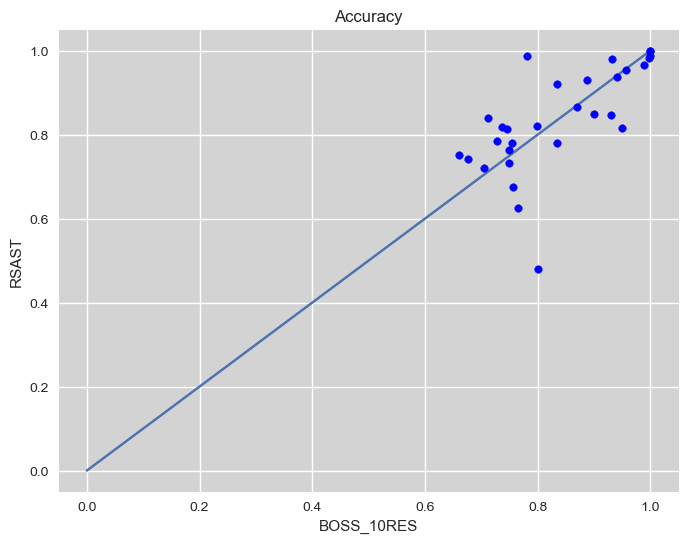

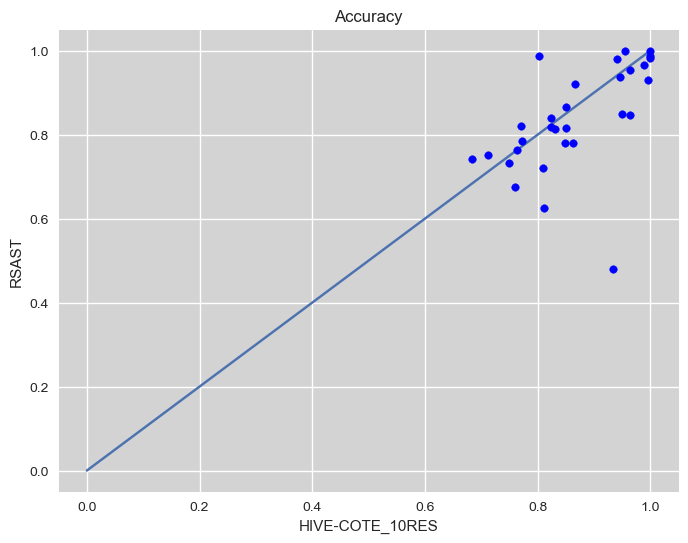

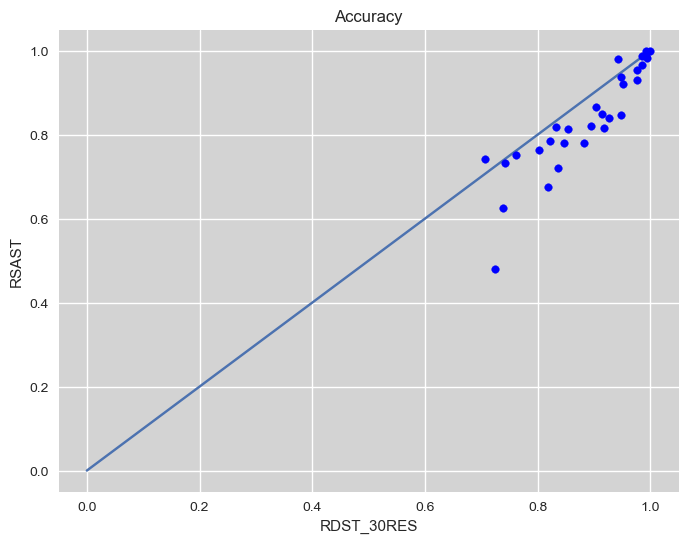

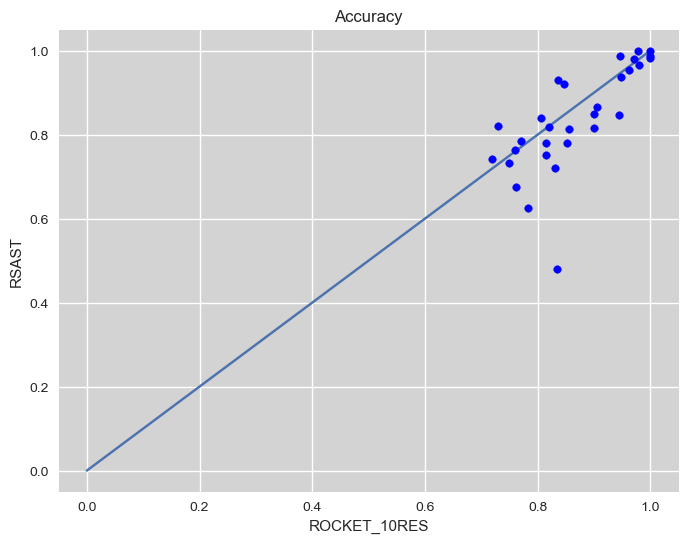

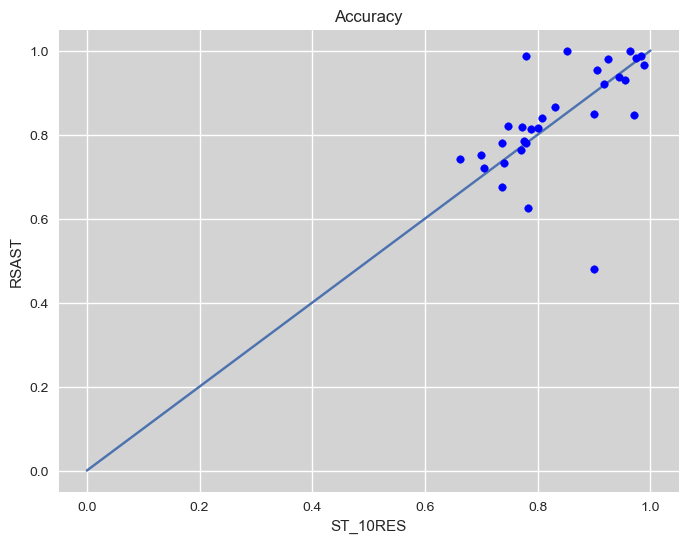

In [43]:
for method in score_by_method.columns.drop(hyperparameter):
    y=score_by_method[hyperparameter]
    x=score_by_method[method]

    # set the style of the plot
    plt.style.use('seaborn')

    # create the plot
    fig, ax = plt.subplots(figsize=(8, 6))

    # plot the line
    ax.plot([0,1], [0,1])

    # plot the points
    ax.scatter(x, y, color='blue', edgecolor='blue', s=30, zorder=10)

    # add labels and title
    ax.set_ylabel(hyperparameter)
    ax.set_xlabel(method)
    ax.set_title('Accuracy')


    # set the background color
    ax.set_facecolor('lightgrey')
    plt.savefig('images_one_vs_one_comparison/'+hyperparameter+'vs'+method+'.png')


In [44]:
# create a pivot table with the mean of time by hyperparameter
time_per_method=pd.pivot_table(df_result, values='time', columns=['classifier_name'],index=['dataset_name'], aggfunc='mean')/60
time_per_method

classifier_name,ACF&PACF: n_random_points=10 nb_inst_per_class=10
dataset_name,
ACSF1,76.067852
Adiac,0.404516
AllGestureWiimoteX,1.693926
AllGestureWiimoteY,1.599983
AllGestureWiimoteZ,1.646046
ArrowHead,0.074400
BME,0.011819
Beef,0.442508
BeetleFly,0.446825


#### Generate CD Diagram comparison

In [45]:
concatenated_df.classifier_name.unique()

array(['ROCKET_10RES', 'BOSS_10RES', 'ST_10RES', 'HIVE-COTE_10RES',
       'RDST_30RES', 'RSAST'], dtype=object)

In [46]:

from cd_function import *
df_perf=pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name','dataset_name'], aggfunc='mean')
df_perf=df_perf.reset_index()
draw_cd_diagram(df_perf, labels=True, fname='images_cd_diagram/cd-diagram_overall_comparison_other_method.png')


c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


{0: 'ST_10RES', 1: 'BOSS_10RES', 2: 'RSAST', 3: 'ROCKET_10RES', 4: 'HIVE-COTE_10RES', 5: 'RDST_30RES'}
[3, 2, 0, 1]
[3, 2, 4]
[3, 5, 4]


In [47]:
df_perf["classifier_name"].unique()

array(['BOSS_10RES', 'HIVE-COTE_10RES', 'RDST_30RES', 'ROCKET_10RES',
       'RSAST', 'ST_10RES'], dtype=object)

In [48]:
_, average_ranks, _ = wilcoxon_holm(df_perf=df_perf)
min_rank= min(average_ranks)
average_ranks=pd.DataFrame(average_ranks)
average_ranks

c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


,0
ST_10RES,4.583333
BOSS_10RES,4.216667
RSAST,3.933333
ROCKET_10RES,3.050000
HIVE-COTE_10RES,2.850000
RDST_30RES,2.366667


In [49]:
uca_ds=pd.read_excel("DataSetsUCLASummary.xlsx")

uca_ds.columns

Index(['USED SAST', 'BAKE OFF', 'N RUNS S17_S16_HT', 'N RUNS S17_SAST_DS',
       'ID', 'Name', 'Type', 'Train ', 'Test ', 'Class', 'Length',
       'RSAST (10,10) WORST SAST?', 'O(|c|nm²)', 'O(|c|nm³)',
       'Approx Time (hours)', 'L25', 'L50', 'L75', 'ED (w=0)',
       'DTW (learned_w) ', 'DTW (w=100)', 'Default rate', 'Data donor/editor',
       '50/L', 'Unnamed: 24'],
      dtype='object')

In [50]:
concatenated_df=concatenated_df.merge(uca_ds, left_on=['dataset_name'],right_on=['Name'])
concatenated_df.columns

Index(['dataset_name', 'accuracy', 'classifier_name', 'time', 'USED SAST',
       'BAKE OFF', 'N RUNS S17_S16_HT', 'N RUNS S17_SAST_DS', 'ID', 'Name',
       'Type', 'Train ', 'Test ', 'Class', 'Length',
       'RSAST (10,10) WORST SAST?', 'O(|c|nm²)', 'O(|c|nm³)',
       'Approx Time (hours)', 'L25', 'L50', 'L75', 'ED (w=0)',
       'DTW (learned_w) ', 'DTW (w=100)', 'Default rate', 'Data donor/editor',
       '50/L', 'Unnamed: 24'],
      dtype='object')

In [51]:
acc_per_type=pd.pivot_table(concatenated_df, values="accuracy", index=["dataset_name","Type",'classifier_name'])
#acc_per_type=concatenated_df
acc_per_type=acc_per_type.reset_index()

In [52]:
max_bx=max(acc_per_type.accuracy)
min_bx=min(acc_per_type.accuracy)


#df_to_cd=pd.pivot_table(df_to_cd, index=['dataset_name','classifier_name'], columns=['rpoint'],values='accuracy')
#df_to_cd = df_to_cd.reindex(columns=["1","10","30","50","100","half_len"])

#print(df_to_cd.head(5))

# Plot
fig, ax = plt.subplots()


#order=list(df_to_cd)
sns.boxplot(data=acc_per_type, y='Type', x='accuracy', hue ='classifier_name')
#plt.boxplot(df_to_cd, labels=list(df_to_cd), showfliers=False)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Axis details

ax.set(ylabel='dataset name', xlabel='accuracy', title='Accuracy Boxplot for Dataset:'+str(df_result["classifier_name"].unique()[0]))

#plt.xticks([1, 2, 3, 4, 5, 6],list(df_to_cd) )
#print(df_to_cd.describe())
plt.tight_layout()
# save plot
plt.savefig('images_boxplot_acc_per_type/boxplot_acc_per_type.png')